# **Project Name**    - Inetegrated Retail analytics for Store Optimization

##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -**  - Sushant Kashikar

# Project Summary

## Loading Data sets and EDA

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import importlib
import preprocessing_eda
importlib.reload(preprocessing_eda)
from sklearn.impute import KNNImputer

In [166]:
feature=pd.read_csv('Features data set.csv')
sales=pd.read_csv('sales data-set.csv')
store=pd.read_csv('stores data-set.csv')

In [167]:
feature.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [168]:
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [169]:
store.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [170]:
feature.shape

(8190, 12)

In [171]:
sales.shape

(421570, 5)

In [172]:
store.shape

(45, 3)

In [173]:
feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [174]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [175]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


Checking for Null values patterns Using Heatmap

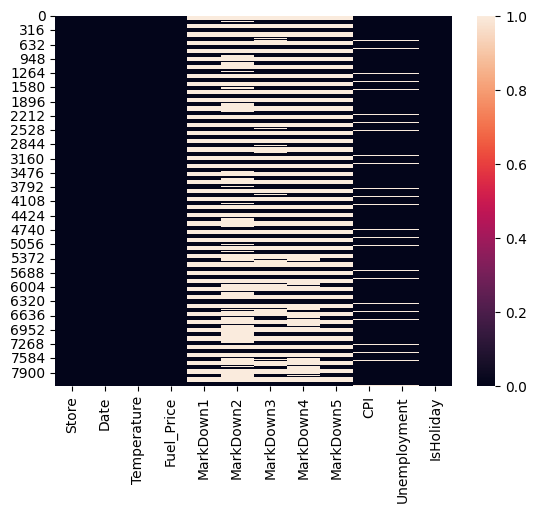

In [176]:
sns.heatmap(feature.isnull());

There are Missing values in Markdown Columns and CPI Before filling them Need to Undertands the terms       
- **What are the MarkDown Columns?**      
In the context of this Walmart sales dataset, MarkDown refers to a temporary price reduction or promotion on products. It's essentially a discount intended to stimulate sales.     
Literal Meaning: "Marking down" the price of an item.       
Business Goal: To increase foot traffic, clear out inventory (e.g., seasonal items), boost sales volume, and compete with other retailers.      
Key Characteristic: These are temporary promotions, not permanent price changes.        

- **What is CPI?**      
The Consumer Price Index (CPI) is a measure that examines the weighted average of prices of a basket of consumer goods and services, such as transportation, food, and medical care. It is calculated by taking price changes for each item in the predetermined basket of goods and averaging them. Changes in the CPI are used to assess price changes associated with the cost of living and are a key indicator of inflation.

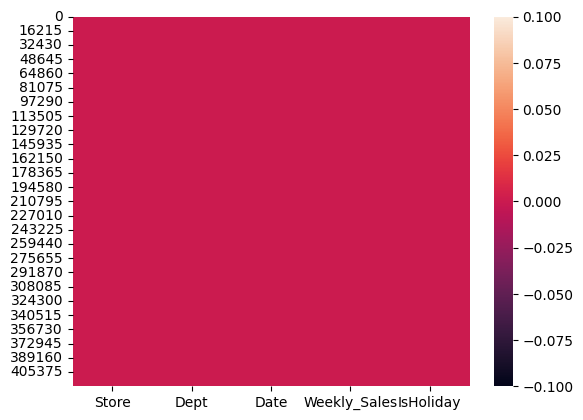

In [177]:
sns.heatmap(sales.isnull());

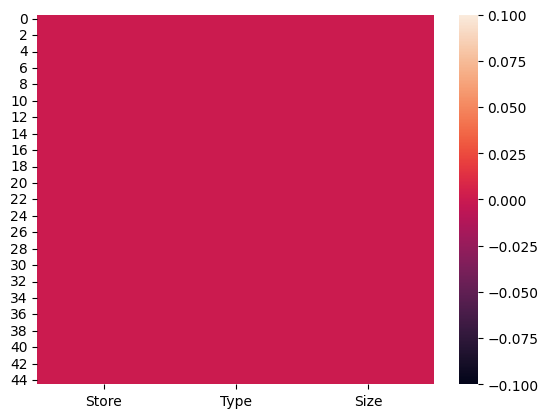

In [178]:
sns.heatmap(store.isnull());

In [179]:
feature[feature["CPI"].isnull()][feature["MarkDown1"].isnull()]

C:\Users\susha\AppData\Local\Temp\ipykernel_5380\329324353.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  feature[feature["CPI"].isnull()][feature["MarkDown1"].isnull()]


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
7643,42,26/07/2013,83.32,3.865,NaN,NaN,0.17,NaN,756.79,NaN,NaN,False
7819,43,14/06/2013,86.44,3.431,NaN,NaN,35.74,NaN,678.28,NaN,NaN,False


In [180]:
feature[feature["CPI"].isnull()][feature["MarkDown2"].isnull()]

C:\Users\susha\AppData\Local\Temp\ipykernel_5380\2860937448.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  feature[feature["CPI"].isnull()][feature["MarkDown2"].isnull()]


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
1261,7,03/05/2013,42.36,3.573,4661.74,NaN,25.74,1145.37,917.91,NaN,NaN,False
1625,9,03/05/2013,66.21,3.386,1984.01,NaN,15.00,771.12,4198.23,NaN,NaN,False
2899,16,03/05/2013,41.41,3.573,1006.27,NaN,13.21,542.17,662.68,NaN,NaN,False
4355,24,03/05/2013,56.72,3.775,10594.55,NaN,70.55,7033.58,1503.35,NaN,NaN,False
5447,30,03/05/2013,65.51,3.386,66.63,NaN,25.23,17.65,706.38,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8003,44,28/06/2013,75.24,3.726,712.49,NaN,NaN,NaN,706.46,NaN,NaN,False
8004,44,05/07/2013,85.58,3.696,869.96,NaN,56.83,NaN,1977.42,NaN,NaN,False
8005,44,12/07/2013,78.93,3.666,182.25,NaN,6.63,NaN,1842.48,NaN,NaN,False
8006,44,19/07/2013,80.81,3.665,118.82,NaN,3.15,NaN,514.08,NaN,NaN,False


In [181]:
feature.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [182]:
sales.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [183]:
store.describe()

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


In [184]:
len(sales["Date"].unique())

143

In [185]:
len(feature["Date"].unique())

182

In [186]:
sales["Date"].value_counts().sort_index()

Date
01/04/2011    2951
01/06/2012    2943
01/07/2011    2931
01/10/2010    2935
02/03/2012    2990
              ... 
30/07/2010    2917
30/09/2011    2951
30/12/2011    3003
31/08/2012    2962
31/12/2010    2943
Name: count, Length: 143, dtype: int64

In [187]:
feature["Date"].value_counts().sort_index()

Date
01/02/2013    45
01/03/2013    45
01/04/2011    45
01/06/2012    45
01/07/2011    45
              ..
30/11/2012    45
30/12/2011    45
31/05/2013    45
31/08/2012    45
31/12/2010    45
Name: count, Length: 182, dtype: int64

In [188]:
sales[sales["Date"] == "01/04/2011"]

,Store,Dept,Date,Weekly_Sales,IsHoliday
60,1,1,01/04/2011,20398.09,False
203,1,2,01/04/2011,46991.58,False
346,1,3,01/04/2011,8734.19,False
489,1,4,01/04/2011,34451.90,False
632,1,5,01/04/2011,23598.55,False
...,...,...,...,...,...
420930,45,93,01/04/2011,2391.98,False
421064,45,94,01/04/2011,4431.57,False
421207,45,95,01/04/2011,52112.96,False
421352,45,97,01/04/2011,6678.37,False


In [189]:
feature[feature["Date"] == "01/04/2011"].head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
60,1,01/04/2011,59.17,3.524,NaN,NaN,NaN,NaN,NaN,214.837166,7.682,False
242,2,01/04/2011,55.43,3.524,NaN,NaN,NaN,NaN,NaN,214.488691,7.931,False
424,3,01/04/2011,68.76,3.524,NaN,NaN,NaN,NaN,NaN,218.211418,7.574,False
606,4,01/04/2011,56.99,3.521,NaN,NaN,NaN,NaN,NaN,128.719935,5.946,False
788,5,01/04/2011,61.50,3.524,NaN,NaN,NaN,NaN,NaN,215.402441,6.489,False


In [190]:
sales.Dept.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 40, 41, 42, 44, 45, 46, 47, 48, 49, 51, 52, 54, 55, 56,
       58, 59, 60, 67, 71, 72, 74, 77, 78, 79, 80, 81, 82, 83, 85, 87, 90,
       91, 92, 93, 94, 95, 96, 97, 98, 99, 39, 50, 43, 65])

In [191]:
sales.Store.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [192]:
feature.Store.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

sales and feature dataset has same numbers of store values However sales dataset has dept values which is not present in feature dataset        
Before merging sales into feature need to check whether Dept has any significant Impact on sale value

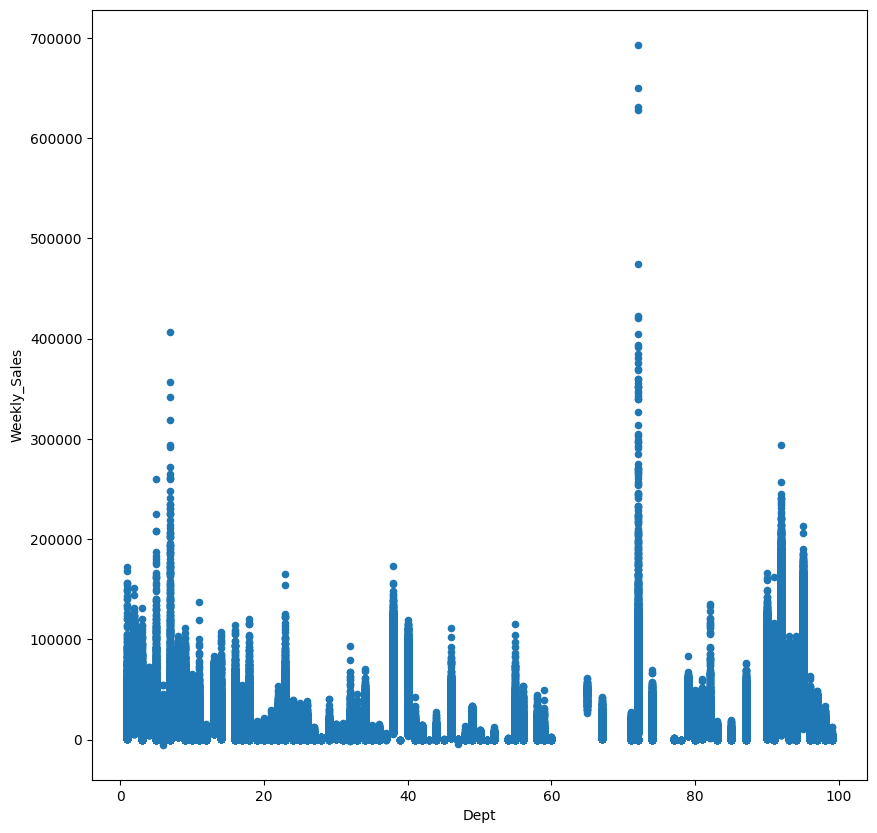

In [193]:
sales.plot(x="Dept", y="Weekly_Sales", kind="scatter", figsize=(10, 10));

In [194]:
sales

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False
...,...,...,...,...,...
421565,45,98,28/09/2012,508.37,False
421566,45,98,05/10/2012,628.10,False
421567,45,98,12/10/2012,1061.02,False
421568,45,98,19/10/2012,760.01,False


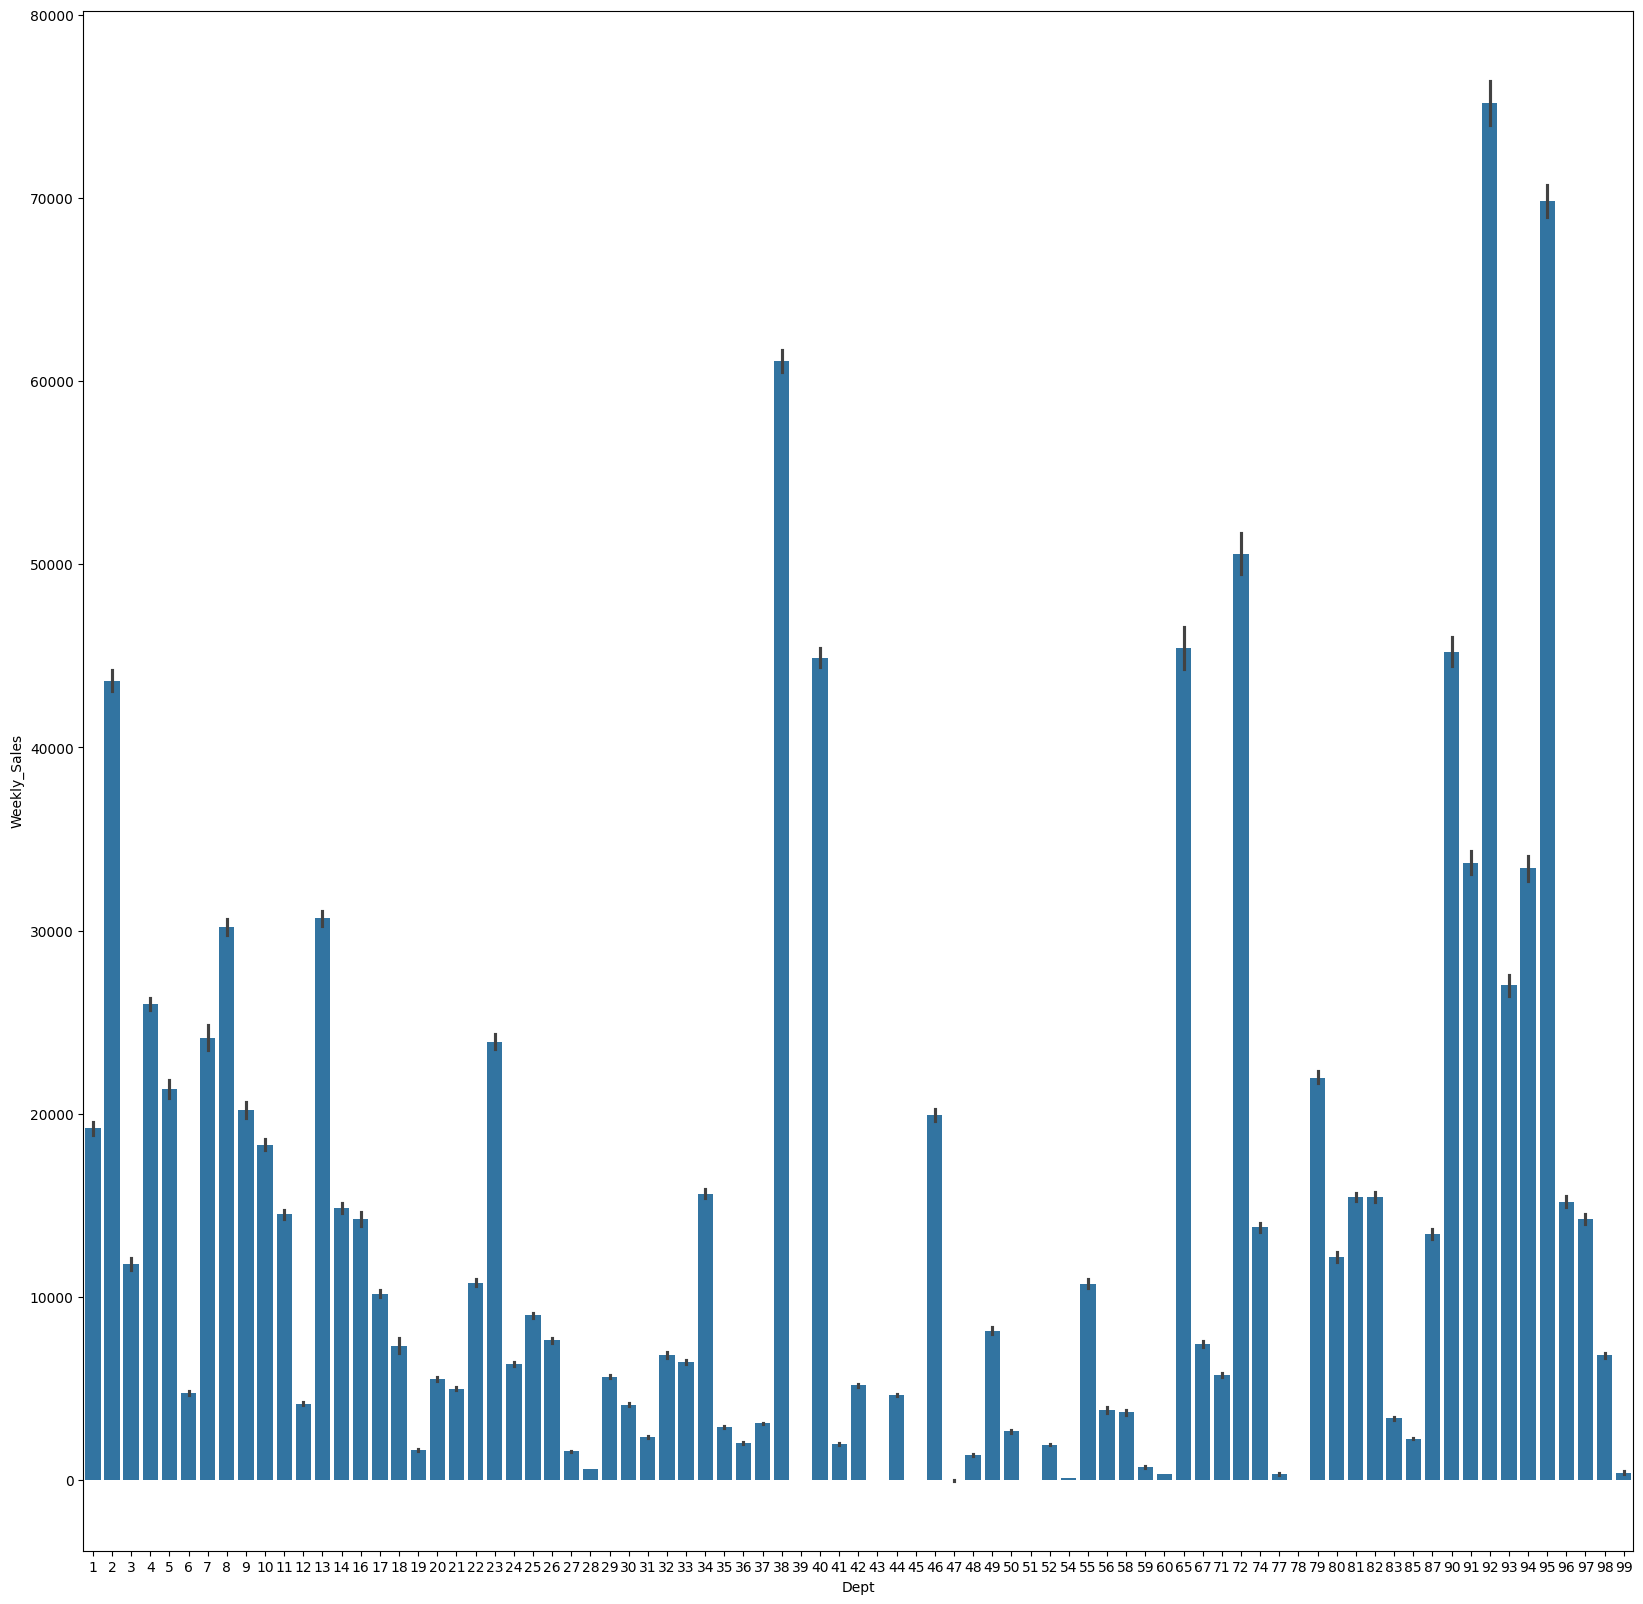

In [195]:
plt.figure(figsize=(20, 20))
sns.barplot(x="Dept", y="Weekly_Sales", data=sales)
plt.show()

<Figure size 1400x800 with 0 Axes>

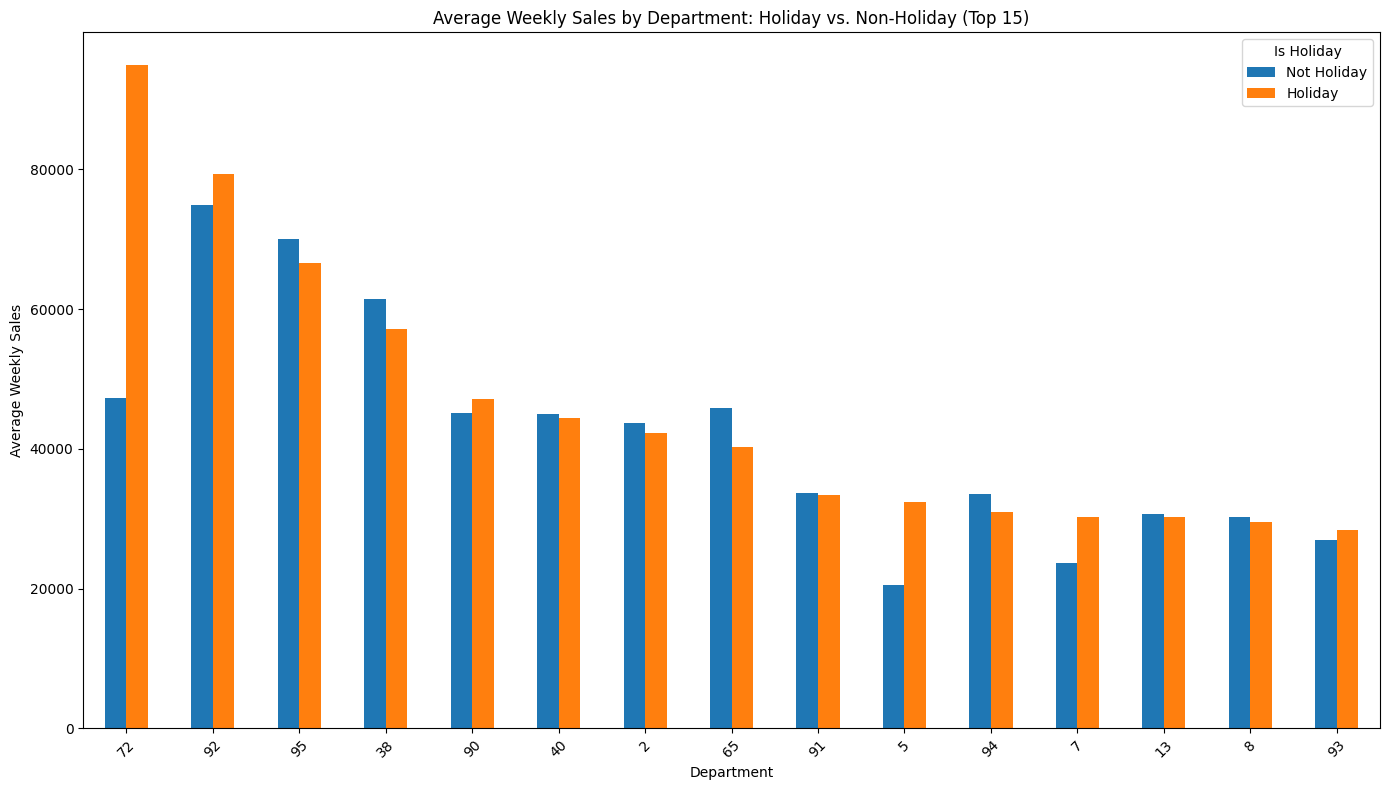

In [196]:
# Calculate mean sales by Dept and IsHoliday
dept_holiday_means = sales.groupby(['Dept', 'IsHoliday'])['Weekly_Sales'].mean().reset_index()

# Pivot the table for easier plotting
pivot_df = dept_holiday_means.pivot(index='Dept', columns='IsHoliday', values='Weekly_Sales')
# Sort departments by their total average sales (or any other logic)
pivot_df = pivot_df.sort_values(by=True, ascending=False) # Sort by holiday sales

# Plot only the top 15 departments
plt.figure(figsize=(14, 8))
pivot_df.head(15).plot(kind='bar', figsize=(14, 8))
plt.title('Average Weekly Sales by Department: Holiday vs. Non-Holiday (Top 15)')
plt.ylabel('Average Weekly Sales')
plt.xlabel('Department')
plt.xticks(rotation=45)
plt.legend(title='Is Holiday', labels=['Not Holiday', 'Holiday'])
plt.tight_layout()
plt.show()

C:\Users\susha\AppData\Local\Temp\ipykernel_5380\1983613387.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
C:\Users\susha\AppData\Local\Temp\ipykernel_5380\1983613387.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)


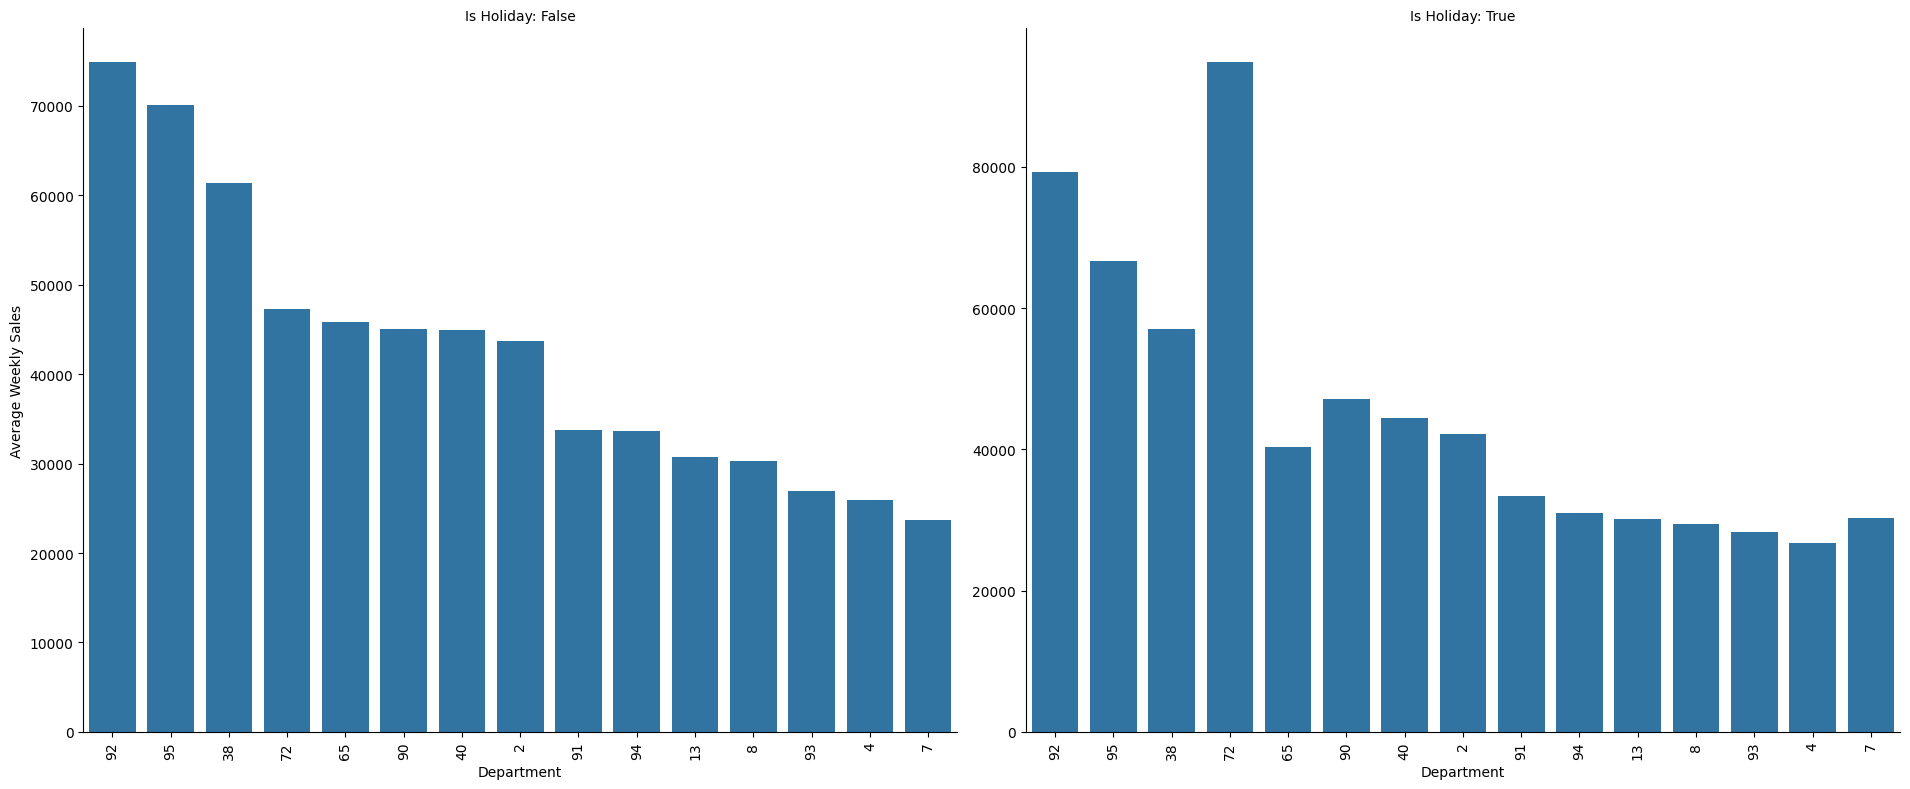

In [197]:
# Get the top N departments by total sales to filter
top_depts = sales.groupby('Dept')['Weekly_Sales'].mean().nlargest(15).index
filtered_sales = sales[sales['Dept'].isin(top_depts)]

# Create a FacetGrid
g = sns.FacetGrid(filtered_sales, col="IsHoliday", height=8, aspect=1.2, sharey=False)
g.map(sns.barplot, 'Dept', 'Weekly_Sales', order=top_depts, errorbar=None)
g.set_axis_labels("Department", "Average Weekly Sales")
g.set_titles("Is Holiday: {col_name}")
for axes in g.axes.flat:
    # Rotate the tick labels
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()

In [198]:
feature.head(2)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True


In [199]:
store.head(2)

,Store,Type,Size
0,1,A,151315
1,2,A,202307


In [200]:
sales.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True


In [201]:
store["Type"].value_counts()

Type
A    22
B    17
C     6
Name: count, dtype: int64


- **Analysis of the CPI Column**      

Nature of CPI: The Consumer Price Index measures inflation. It's not a random number; it has a clear trend and seasonality over time. It generally increases over the long term but can have short-term fluctuations.       

Pattern in the Data: Looking at dataset, the NA values aren't random. They appear only at the end of the time series (in 2013). This is a critical observation.        

Relationship with other variables: CPI is a macroeconomic indicator. It's influenced by national economic policy, not store-specific variables like Temperature or Fuel_Price. Its value is likely identical for all stores on a given date (it's a national index).  


- **Time-Based Interpolation**
- Why it's the best choice:

**Preserves Trend**: CPI has a strong time-based trend. Interpolation between known points before and after the missing values will accurately capture the gradual increase (inflation) that CPI is known for.

**Handles the Pattern Perfectly**: Since the missing data is at the end of a time series for a specific store, simple forward-fill or using the store's mean would be invalid. The missing values need to follow the established national trend.

**Conceptual Correctness**: CPI for a missing week in 2013 should be a value between the CPI of the previous week and the next week (if it existed). Interpolation is the mathematical expression of this logic.

In [202]:
feature.head(2)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True


In [203]:
# Ensure the Date column is in datetime format
feature['Date'] = pd.to_datetime(feature['Date'], format='%d/%m/%Y')
feature = feature.sort_values(by=['Store', 'Date'])
feature["CPI"]=feature.groupby("Store")["CPI"].apply(lambda x: x.interpolate(method='linear')).values

In [204]:
# Same Performed for Sales data
sales['Date'] = pd.to_datetime(sales['Date'], format='%d/%m/%Y')

In [205]:
feature["Unemployment"].isna().sum()

np.int64(585)

In [206]:
feature["Unemployment"]=feature.groupby("Store")["Unemployment"].apply(lambda x: x.interpolate(method='linear')).values

In [207]:
feature["Unemployment"].isna().sum()

np.int64(0)

In [208]:
feature

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,193.589304,8.335,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,193.589304,8.335,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,193.589304,8.335,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,193.589304,8.335,False


Store Dataset can be easily Merged with Feature Dataset as There are only 3 Type of stores in store dataset and Store column has Unique values Coresponding with Feature dataset store column

In [209]:
# Using One Hot encoder for categorical data in store Dataset
onehot=pd.get_dummies(store["Type"],dtype=int)
store[onehot.columns]=onehot
store.drop("Type",axis=1,inplace=True)
store.head()

,Store,Size,A,B,C
0,1,151315,1,0,0
1,2,202307,1,0,0
2,3,37392,0,1,0
3,4,205863,1,0,0
4,5,34875,0,1,0


In [210]:
feature_store=pd.merge(store,feature,how="left",on="Store")
feature_store.head()

,Store,Size,A,B,C,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,151315,1,0,0,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,151315,1,0,0,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,151315,1,0,0,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,151315,1,0,0,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,151315,1,0,0,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


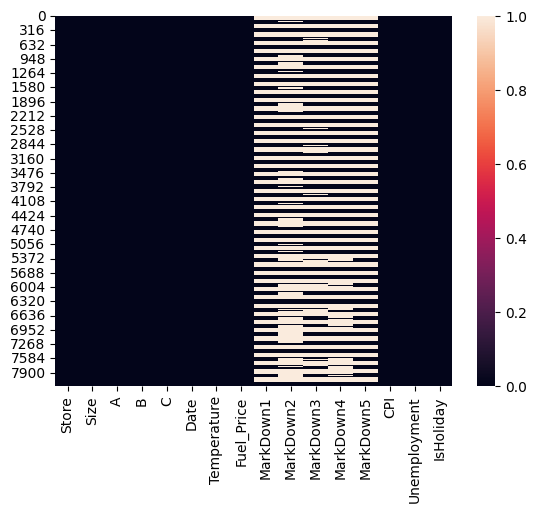

In [211]:
sns.heatmap(feature_store.isnull());

In [212]:
feature_store[feature_store["Unemployment"].notnull()]

,Store,Size,A,B,C,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,151315,1,0,0,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,151315,1,0,0,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,151315,1,0,0,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,151315,1,0,0,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,151315,1,0,0,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,118221,0,1,0,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,193.589304,8.335,False
8186,45,118221,0,1,0,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,193.589304,8.335,False
8187,45,118221,0,1,0,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,193.589304,8.335,False
8188,45,118221,0,1,0,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,193.589304,8.335,False


In [213]:
feature_store[["MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5"]]=feature_store[["MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5"]].fillna(0)

In [214]:
feature_store.groupby("Store")["Unemployment"].value_counts()

Store  Unemployment
1      6.314           17
       7.838           14
       7.962           14
       6.525           13
       6.573           13
                       ..
45     8.684           13
       8.743           13
       8.899           13
       8.549           12
       8.992            8
Name: count, Length: 626, dtype: int64

In [215]:
# looking for any pattern
feature_store[feature_store["Unemployment"]==6.525]

,Store,Size,A,B,C,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
152,1,151315,1,0,0,2013-01-04,41.73,3.161,1214.08,25366.33,15.01,72.36,3940.02,224.080983,6.525,False
153,1,151315,1,0,0,2013-01-11,50.32,3.243,6520.24,16134.60,12.17,774.55,4001.25,224.201552,6.525,False
154,1,151315,1,0,0,2013-01-18,42.92,3.237,3772.69,3559.46,3.88,246.62,1900.40,224.235813,6.525,False
155,1,151315,1,0,0,2013-01-25,53.37,3.227,965.89,1097.91,0.10,225.36,1831.88,224.235552,6.525,False
156,1,151315,1,0,0,2013-02-01,56.46,3.244,9290.91,1359.90,265.00,20657.82,972.61,224.235290,6.525,False
157,1,151315,1,0,0,2013-02-08,56.67,3.417,32355.16,729.80,280.89,20426.61,4671.78,224.235029,6.525,True
158,1,151315,1,0,0,2013-02-15,49.66,3.475,72937.29,6665.52,47.21,13014.67,6310.18,224.276053,6.525,False
159,1,151315,1,0,0,2013-02-22,50.25,3.597,20107.75,3163.89,42.20,15657.30,5812.86,224.420289,6.525,False
160,1,151315,1,0,0,2013-03-01,48.01,3.711,10610.74,261.46,2.80,25.54,2747.59,224.564526,6.525,False
161,1,151315,1,0,0,2013-03-08,50.81,3.658,5000.58,290.46,78.77,606.15,3697.11,224.708763,6.525,False


Sales Dataset

In [216]:
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [217]:
sales.pivot_table(index=["Date","Store"], values="Weekly_Sales", aggfunc="mean")

Weekly_Sales
Date       Store              
2010-02-05 1      22516.313699
           2      29273.828219
           3       7101.880308
           4      29248.546164
           5       5115.695161
...                        ...
2012-10-26 41     18285.313750
           42      9899.155385
           43     12241.740625
           44      6564.855818
           45     11347.484030

[6435 rows x 1 columns]

In [218]:
len(sales.Date.unique())

143

In [219]:
len(feature_store.Date.unique())

182

In [220]:
missing_date=[]
for i in feature_store["Date"].unique():
    if i not in sales["Date"].unique():
        missing_date.append(i)

In [221]:
len(missing_date)

39

In [222]:
feature_store[
    (feature_store["Date"] == "2010-02-05") & 
    ((feature_store["Store"] == 1) | (feature_store["Store"] == 2))
]

,Store,Size,A,B,C,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,151315,1,0,0,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
182,2,202307,1,0,0,2010-02-05,40.19,2.572,0.0,0.0,0.0,0.0,0.0,210.752605,8.324,False


In [223]:
feature_store[feature_store["Date"].isin(missing_date)]

,Store,Size,A,B,C,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
143,1,151315,1,0,0,2012-11-02,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,False
144,1,151315,1,0,0,2012-11-09,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,False
145,1,151315,1,0,0,2012-11-16,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,False
146,1,151315,1,0,0,2012-11-23,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,True
147,1,151315,1,0,0,2012-11-30,52.34,3.207,2460.03,0.00,3838.35,150.57,6966.34,223.610984,6.573,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,118221,0,1,0,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,193.589304,8.335,False
8186,45,118221,0,1,0,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,193.589304,8.335,False
8187,45,118221,0,1,0,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,193.589304,8.335,False
8188,45,118221,0,1,0,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,193.589304,8.335,False


In [224]:
sales.shape

(421570, 5)

In [225]:
feature_store.shape

(8190, 16)

In [226]:
store.shape

(45, 5)

In [227]:
feature_store.head(2)

,Store,Size,A,B,C,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,151315,1,0,0,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
1,1,151315,1,0,0,2010-02-12,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True


In [228]:
sales.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True


In [229]:
sales.shape

(421570, 5)

In [230]:
feature_store_sales= pd.DataFrame()
feature_store_sales=feature_store.merge(sales,how="left",on=["Store","Date","IsHoliday"])

In [231]:
423325-421570

1755

As it can Be notices that There are 1755 additional records because of sales dataset has those dates missing in comparison to feature dataset

In [232]:
feature_store.shape

(8190, 16)

In [233]:
feature_store_sales.shape

(423325, 18)

In [234]:
feature_store_sales[feature_store_sales["Weekly_Sales"].isnull()]

,Store,Size,A,B,C,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales
10244,1,151315,1,0,0,2012-11-02,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,False,NaN,NaN
10245,1,151315,1,0,0,2012-11-09,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,False,NaN,NaN
10246,1,151315,1,0,0,2012-11-16,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,False,NaN,NaN
10247,1,151315,1,0,0,2012-11-23,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,True,NaN,NaN
10248,1,151315,1,0,0,2012-11-30,52.34,3.207,2460.03,0.00,3838.35,150.57,6966.34,223.610984,6.573,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423320,45,118221,0,1,0,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,193.589304,8.335,False,NaN,NaN
423321,45,118221,0,1,0,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,193.589304,8.335,False,NaN,NaN
423322,45,118221,0,1,0,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,193.589304,8.335,False,NaN,NaN
423323,45,118221,0,1,0,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,193.589304,8.335,False,NaN,NaN


In [235]:
sales["Dept"]

0          1
1          1
2          1
3          1
4          1
          ..
421565    98
421566    98
421567    98
421568    98
421569    98
Name: Dept, Length: 421570, dtype: int64

In [236]:
feature_store_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423325 entries, 0 to 423324
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         423325 non-null  int64         
 1   Size          423325 non-null  int64         
 2   A             423325 non-null  int64         
 3   B             423325 non-null  int64         
 4   C             423325 non-null  int64         
 5   Date          423325 non-null  datetime64[ns]
 6   Temperature   423325 non-null  float64       
 7   Fuel_Price    423325 non-null  float64       
 8   MarkDown1     423325 non-null  float64       
 9   MarkDown2     423325 non-null  float64       
 10  MarkDown3     423325 non-null  float64       
 11  MarkDown4     423325 non-null  float64       
 12  MarkDown5     423325 non-null  float64       
 13  CPI           423325 non-null  float64       
 14  Unemployment  423325 non-null  float64       
 15  IsHoliday     423

In [237]:
feature_store_sales['Date_Modified'] = feature_store_sales['Date'].astype(int)// 10**9
feature_store_sales

,Store,Size,A,B,C,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Date_Modified
0,1,151315,1,0,0,2010-02-05,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,False,1.0,24924.50,1265328000
1,1,151315,1,0,0,2010-02-05,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,False,2.0,50605.27,1265328000
2,1,151315,1,0,0,2010-02-05,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,False,3.0,13740.12,1265328000
3,1,151315,1,0,0,2010-02-05,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,False,4.0,39954.04,1265328000
4,1,151315,1,0,0,2010-02-05,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,False,5.0,32229.38,1265328000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423320,45,118221,0,1,0,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,193.589304,8.335,False,NaN,NaN,1372377600
423321,45,118221,0,1,0,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,193.589304,8.335,False,NaN,NaN,1372982400
423322,45,118221,0,1,0,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,193.589304,8.335,False,NaN,NaN,1373587200
423323,45,118221,0,1,0,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,193.589304,8.335,False,NaN,NaN,1374192000


In [238]:
feature_store_sales.drop("Date", axis=1).columns

Index(['Store', 'Size', 'A', 'B', 'C', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'IsHoliday', 'Dept', 'Weekly_Sales', 'Date_Modified'],
      dtype='object')

In [249]:
feature_store_sales["Store"]=feature_store_sales["Store"].astype(int)

In [ ]:
imputer=KNNImputer(n_neighbors=5)
New_Data=imputer.fit_transform(feature_store_sales.drop("Date", axis=1))

In [252]:
feature_store_sales[feature_store_sales.drop("Date", axis=1).columns]=pd.DataFrame(New_Data,columns=feature_store_sales.drop("Date", axis=1).columns)

In [256]:
feature_store_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423325 entries, 0 to 423324
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Store          423325 non-null  float64       
 1   Size           423325 non-null  float64       
 2   A              423325 non-null  float64       
 3   B              423325 non-null  float64       
 4   C              423325 non-null  float64       
 5   Date           423325 non-null  datetime64[ns]
 6   Temperature    423325 non-null  float64       
 7   Fuel_Price     423325 non-null  float64       
 8   MarkDown1      423325 non-null  float64       
 9   MarkDown2      423325 non-null  float64       
 10  MarkDown3      423325 non-null  float64       
 11  MarkDown4      423325 non-null  float64       
 12  MarkDown5      423325 non-null  float64       
 13  CPI            423325 non-null  float64       
 14  Unemployment   423325 non-null  float64       
 15  

In [254]:
feature_store_sales["Store"].astype(int)

0          1
1          1
2          1
3          1
4          1
          ..
423320    45
423321    45
423322    45
423323    45
423324    45
Name: Store, Length: 423325, dtype: int64

In [257]:
feature_store_sales

,Store,Size,A,B,C,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Date_Modified
0,1.0,151315.0,1.0,0.0,0.0,2010-02-05,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,0.0,1.0,24924.500,1.265328e+09
1,1.0,151315.0,1.0,0.0,0.0,2010-02-05,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,0.0,2.0,50605.270,1.265328e+09
2,1.0,151315.0,1.0,0.0,0.0,2010-02-05,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,0.0,3.0,13740.120,1.265328e+09
3,1.0,151315.0,1.0,0.0,0.0,2010-02-05,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,0.0,4.0,39954.040,1.265328e+09
4,1.0,151315.0,1.0,0.0,0.0,2010-02-05,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,0.0,5.0,32229.380,1.265328e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423320,45.0,118221.0,0.0,1.0,0.0,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,193.589304,8.335,0.0,57.4,4817.530,1.372378e+09
423321,45.0,118221.0,0.0,1.0,0.0,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,193.589304,8.335,0.0,54.8,16623.524,1.372982e+09
423322,45.0,118221.0,0.0,1.0,0.0,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,193.589304,8.335,0.0,57.4,4817.530,1.373587e+09
423323,45.0,118221.0,0.0,1.0,0.0,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,193.589304,8.335,0.0,57.4,4817.530,1.374192e+09
